## `Online Fraud Transaction Detection Model`

In [50]:
# load the library
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import joblib
import matplotlib.pyplot as plt

## `Load The Data`

In [51]:
# load the dataset
data = pd.read_csv('new_file.csv')

In [52]:
# check the data info
data.head(20)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 485.4+ MB


## ` Data Preprocessing And Cleaning`

In [54]:
# check for missing rolls 
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [55]:
# check for duplicate rows
data.duplicated().sum()

0

## `Exploratory Data Analysis (EDA)`

<Axes: xlabel='type', ylabel='count'>

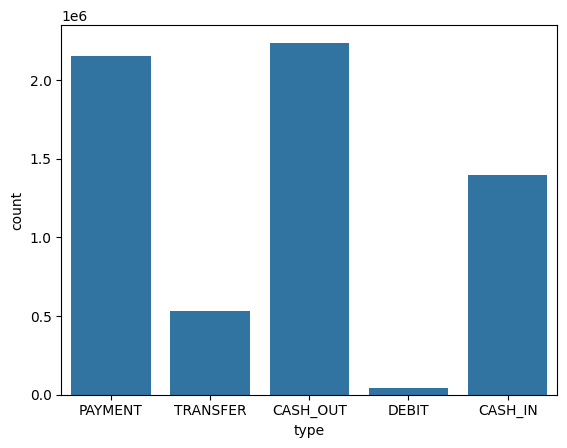

In [56]:
# do a countplot of type column
sns.countplot(x='type', data=data)

In [57]:
# do a world count of prediction value
data['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

## `Feature Engineering`

In [58]:
# select features from the dataset
df = data[['type', 'amount', 'oldbalanceOrg',
            'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud']]

In [59]:
# select target and features
X = df.drop('isFraud', axis=1)
y = df['isFraud']

## `Slipt The Dataset`

In [60]:
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42)

In [61]:
# load the models
log_reg = LogisticRegression()

In [63]:
# fit the model in a pipeline.
# replace the previous single-step pipeline with a ColumnTransformer + pipeline
num_features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
cat_features = ['type']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ]
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('log_reg', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

In [64]:
# fit the pipeline into the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['type'])])),
                ('log_reg',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [65]:
# print the accuracy score and classification report
y_pred = pipeline.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9461322536942329
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97   1270904
           1       0.02      0.94      0.04      1620

    accuracy                           0.95   1272524
   macro avg       0.51      0.94      0.51   1272524
weighted avg       1.00      0.95      0.97   1272524



In [66]:
# save the model
joblib.dump(pipeline, 'fraud_detection_model.pkl')

['fraud_detection_model.pkl']